In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import numpy as np

In [3]:
from tvb.simulator.lab import *

In [4]:
# let's start with asynchronous
adex = models.ZerlautAdaptationSecondOrder(
    g_L=np.r_[10.0],
    E_L_e=np.r_[-63.0], #-63.0
    E_L_i=np.r_[-65.0],
    C_m=np.r_[200.0],
    b_e=np.r_[0.],      # 0. for asynchronous or 60.0 for synchronous
    a_e=np.r_[0.0],
    b_i=np.r_[0.0],
    a_i=np.r_[0.0],
    tau_w_e=np.r_[500.0],
    tau_w_i=np.r_[1.0],
    E_e=np.r_[0.0],
    E_i=np.r_[-80.0],
    Q_e=np.r_[1.5],
    Q_i=np.r_[5.0],
    tau_e=np.r_[5.0],
    tau_i=np.r_[5.0],
    N_tot=np.r_[10000],
    p_connect_e=np.r_[0.05], 
    p_connect_i=np.r_[0.05], 
    g=np.r_[0.2],
    T=np.r_[40.0],
    P_e=np.r_[
        [
            -0.0498,
            0.00506,
            -0.025,
            0.0014,
            -0.00041,
            0.0105,
            -0.036,
            0.0074,
            0.0012,
            -0.0407,
        ]
    ],
    P_i=np.r_[
        [
            -0.0514,
            0.004,
            -0.0083,
            0.0002,
            -0.0005,
            0.0014,
            -0.0146,
            0.0045,
            0.0028,
            -0.0153,
        ]
    ],
    external_input_ex_ex=np.r_[0.315 * 1e-3],
    external_input_ex_in=np.r_[0.000],
    external_input_in_ex=np.r_[0.315 * 1e-3],
    external_input_in_in=np.r_[0.000],
    K_ext_e=np.r_[400],
    K_ext_i=np.r_[0],
    tau_OU=np.r_[5.0],
    weight_noise=np.r_[1e-4], #10.5*1e-5,

)
adex.variables_of_interest=['E', 'I', 'C_ee', 'C_ei', 'C_ii', 'W_e', 'W_i', 'ou_drift']

# I wish there was a better way to set initial conditions
adex.state_variable_range["E"] = [0.000, 0.000]
adex.state_variable_range["I"] = [0.00, 0.00]
adex.state_variable_range["C_ee"] = [0.0, 0.0]
adex.state_variable_range["C_ei"] = [0.0, 0.0]
adex.state_variable_range["C_ii"] = [0.0, 0.0]
adex.state_variable_range["W_e"] = [100., 100.0] # 100?
adex.state_variable_range["W_i"] = [0.0, 0.0]
adex.state_variable_range["ou_drift"] = [0.0, 0.0]

In [5]:
import os

In [21]:
conn = connectivity.Connectivity.from_file(
    os.path.abspath("QL_20120814_Connectivity.zip"),
)
conn.weights = conn.weights/(np.sum(conn.weights,axis=0)+1e-12)
conn.speed = np.r_[4.0]

In [22]:
transient = 2000.0

In [9]:
sim = simulator.Simulator(
    model=adex,
    connectivity=conn,
    conduction_speed=conn.speed.item(), 
    coupling=coupling.Linear(a=np.r_[0.3]),
    integrator=integrators.HeunStochastic(
        noise=noise.Additive(nsig=np.r_[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]),
        dt = 0.1,
    ),
    monitors=[monitors.TemporalAverage(period=1.0)],
    #stimulus=stim,
).configure()

In [10]:
(out_t, out_d),  = sim.run(simulation_length=8000 + transient)

In [11]:
adex.state_variables

['E', 'I', 'C_ee', 'C_ei', 'C_ii', 'W_e', 'W_i', 'ou_drift']

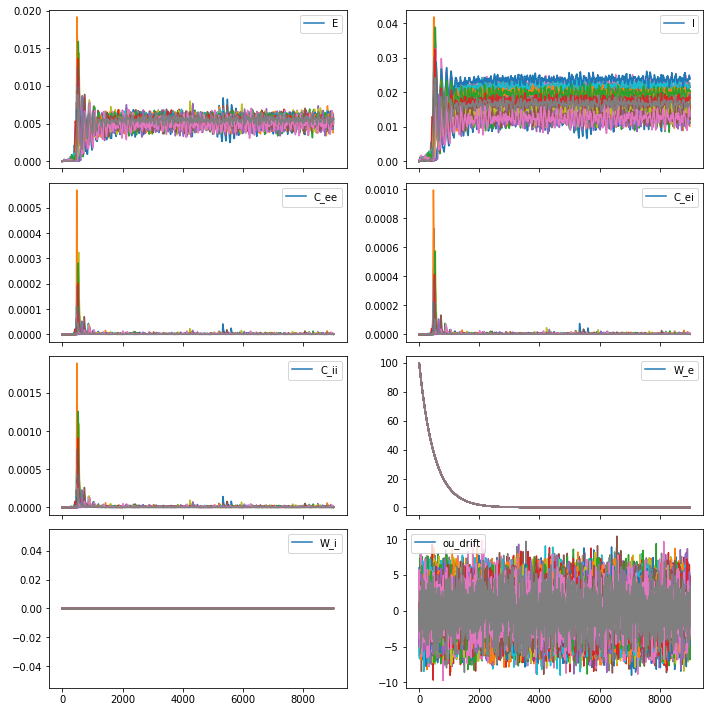

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(adex.state_variables, axs.flatten())):
    ax.plot(out_t, out_d[:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [18]:
t_trans = int(transient)

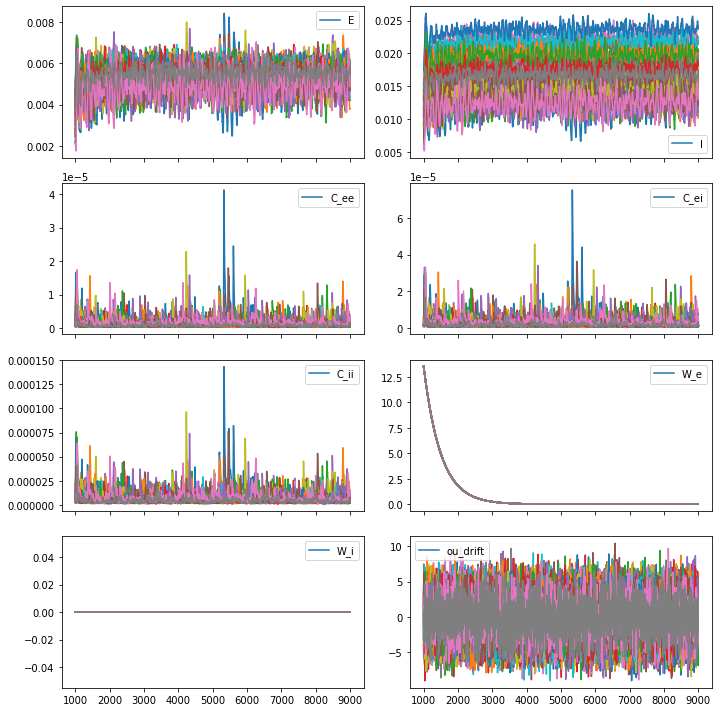

In [20]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(adex.state_variables, axs.flatten())):
    ax.plot(out_t[t_trans:], out_d[t_trans:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [23]:
## synchronous

In [24]:
sim = simulator.Simulator(
    model=adex,
    connectivity=conn,
    conduction_speed=conn.speed.item(), 
    coupling=coupling.Linear(a=np.r_[0.3]),
    integrator=integrators.HeunStochastic(
        noise=noise.Additive(nsig=np.r_[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]),
        dt = 0.1,
    ),
    monitors=[monitors.TemporalAverage(period=1.0)],
    #stimulus=stim,
).configure()

sim.model.b_e = np.r_[60.]

In [25]:
(out_t, out_d),  = sim.run(simulation_length=8000 + transient)

In [26]:
adex.state_variables

['E', 'I', 'C_ee', 'C_ei', 'C_ii', 'W_e', 'W_i', 'ou_drift']

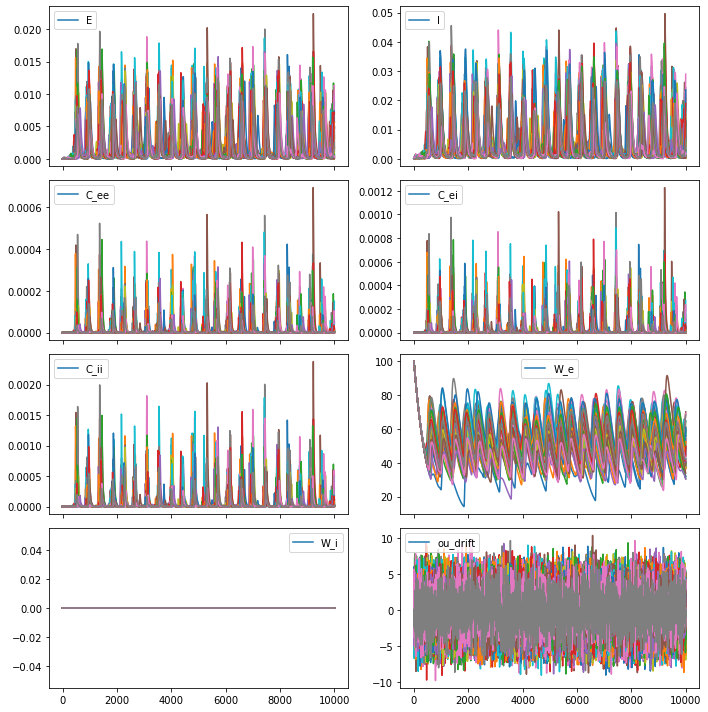

In [27]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(adex.state_variables, axs.flatten())):
    ax.plot(out_t, out_d[:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [28]:
t_trans = int(transient)

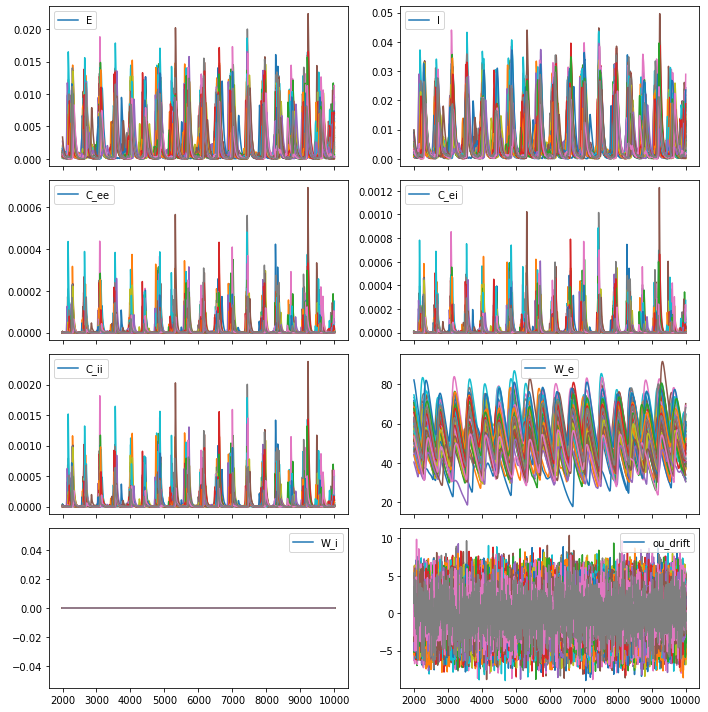

In [29]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(adex.state_variables, axs.flatten())):
    ax.plot(out_t[t_trans:], out_d[t_trans:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()